# Please create these folders in your google drive
/content/drive/MyDrive/Colab Notebooks/Chessman &
/content/drive/MyDrive/Colab Notebooks/Chessman/train &
/content/drive/MyDrive/Colab Notebooks/Chessman/test &
/content/drive/MyDrive/Colab Notebooks/Chessman/train_data &
/content/drive/MyDrive/Colab Notebooks/Chessman/test_data 

inside test and train, insert the training and testing folders (Bishop, King, Knight, Pawn, Queen, Rook).

# Connect to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Import Neccesary Libraries 

In [ ]:
import torchvision
import torchvision.datasets as dsets
import torchvision.transforms as transforms

import torch
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.init

import matplotlib.pyplot as plt
import random

# switch to GPU

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Resize and Import the training dataset

In [ ]:
trans = transforms.Compose([
    transforms.Resize((128, 128))
    ])

In [ ]:
train_data = torchvision.datasets.ImageFolder(root="/content/drive/MyDrive/Chessman/train", transform=trans)

In [ ]:
for idx, value in enumerate(train_data):
  data, label = value
  print(idx, data, label)

  if(label==0):
    data.save("/content/drive/MyDrive/Chessman/train_data/Bishop/%d_%d.jpeg"%(idx, label))
  elif(label==1):
    data.save("/content/drive/MyDrive/Chessman/train_data/King/%d_%d.jpeg"%(idx, label))
  elif(label==2):
    data.save("/content/drive/MyDrive/Chessman/train_data/Knight/%d_%d.jpeg"%(idx, label))
  elif(label==3):
    data.save("/content/drive/MyDrive/Chessman/train_data/Pawn/%d_%d.jpeg"%(idx, label))
  elif(label==4):
    data.save("/content/drive/MyDrive/Chessman/train_data/Queen/%d_%d.jpeg"%(idx, label))
  elif(label==5):
    data.save("/content/drive/MyDrive/Chessman/train_data/Rook/%d_%d.jpeg"%(idx, label))

0 <PIL.Image.Image image mode=RGB size=128x128 at 0x7F9A4C4A0460> 0
1 <PIL.Image.Image image mode=RGB size=128x128 at 0x7F9B141AEBB0> 0
2 <PIL.Image.Image image mode=RGB size=128x128 at 0x7F9A4C490E80> 0
3 <PIL.Image.Image image mode=RGB size=128x128 at 0x7F9A4C4A0A90> 0
4 <PIL.Image.Image image mode=RGB size=128x128 at 0x7F9A4C4A0A00> 0
5 <PIL.Image.Image image mode=RGB size=128x128 at 0x7F9A4C4A0A90> 0
6 <PIL.Image.Image image mode=RGB size=128x128 at 0x7F9B141AE220> 0
7 <PIL.Image.Image image mode=RGB size=128x128 at 0x7F9B141AEBB0> 0
8 <PIL.Image.Image image mode=RGB size=128x128 at 0x7F9A4C4A0880> 0
9 <PIL.Image.Image image mode=RGB size=128x128 at 0x7F9A4C4A0A00> 0
10 <PIL.Image.Image image mode=RGB size=128x128 at 0x7F9A4C4A0880> 0
11 <PIL.Image.Image image mode=RGB size=128x128 at 0x7F9A4C4A0A00> 0
12 <PIL.Image.Image image mode=RGB size=128x128 at 0x7F9A4C490E80> 0
13 <PIL.Image.Image image mode=RGB size=128x128 at 0x7F9B141AEC40> 0
14 <PIL.Image.Image image mode=RGB size=128x

# Resize and import the testing dataset

In [ ]:
trans = transforms.Compose([
    transforms.Resize((128, 128))
    ])

In [ ]:
test_data = torchvision.datasets.ImageFolder(root="/content/drive/MyDrive/Chessman/test", transform=trans)

In [ ]:
for idx, value in enumerate(test_data):
  data, label = value
  print(idx, data, label)
  if(label==0):
    data.save("/content/drive/MyDrive/Chessman/test_data/Bishop/%d_%d.jpeg"%(idx, label))
  elif(label==1):
    data.save("/content/drive/MyDrive/Chessman/test_data/King/%d_%d.jpeg"%(idx, label))
  elif(label==2):
    data.save("/content/drive/MyDrive/Chessman/test_data/Knight/%d_%d.jpeg"%(idx, label))
  elif(label==3):
    data.save("/content/drive/MyDrive/Chessman/test_data/Pawn/%d_%d.jpeg"%(idx, label))
  elif(label==4):
    data.save("/content/drive/MyDrive/Chessman/test_data/Queen/%d_%d.jpeg"%(idx, label))
  elif(label==5):
    data.save("/content/drive/MyDrive/Chessman/test_data/Rook/%d_%d.jpeg"%(idx, label))

0 <PIL.Image.Image image mode=RGB size=128x128 at 0x7F9A4BDDC700> 0
1 <PIL.Image.Image image mode=RGB size=128x128 at 0x7F9A4BDDC550> 0
2 <PIL.Image.Image image mode=RGB size=128x128 at 0x7F9A4BDDC4C0> 0
3 <PIL.Image.Image image mode=RGB size=128x128 at 0x7F9A4BDDC130> 0
4 <PIL.Image.Image image mode=RGB size=128x128 at 0x7F9A4BDDC340> 0
5 <PIL.Image.Image image mode=RGB size=128x128 at 0x7F9A4BDDC700> 0
6 <PIL.Image.Image image mode=RGB size=128x128 at 0x7F9A4BDDCA00> 0
7 <PIL.Image.Image image mode=RGB size=128x128 at 0x7F9A4BDDC730> 0
8 <PIL.Image.Image image mode=RGB size=128x128 at 0x7F9A4BDDC340> 0
9 <PIL.Image.Image image mode=RGB size=128x128 at 0x7F9A4BDDC3A0> 0
10 <PIL.Image.Image image mode=RGB size=128x128 at 0x7F9A4BDDC9A0> 0
11 <PIL.Image.Image image mode=RGB size=128x128 at 0x7F9A4BDDCE50> 0
12 <PIL.Image.Image image mode=RGB size=128x128 at 0x7F9A4BDDC250> 0
13 <PIL.Image.Image image mode=RGB size=128x128 at 0x7F9A4BDDCCA0> 0
14 <PIL.Image.Image image mode=RGB size=128x

# Create the CNN model

## Simple CNN on 28x28

In [ ]:
class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        self.fc = torch.nn.Linear(64 * 7 * 7, 6, bias=True)
        torch.nn.init.xavier_uniform_(self.fc.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

## Deeper CNN on 64x64



In [ ]:
class DeeperCNN(torch.nn.Module):
    def __init__(self):
        super(DeeperCNN, self).__init__()

        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        self.fc1 = torch.nn.Linear(128 * 8 * 8, 256, bias=True)
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        self.fc2 = torch.nn.Linear(256, 128, bias=True)
        torch.nn.init.xavier_uniform_(self.fc2.weight)
        self.fc3 = torch.nn.Linear(128, 6, bias=True)
        torch.nn.init.xavier_uniform_(self.fc3.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = torch.nn.ReLU()(out)
        out = self.fc2(out)
        out = torch.nn.ReLU()(out)
        out = self.fc3(out)
        return out


## SuperCNN on 64x64

In [ ]:
#for 64x64
class SuperCNN(torch.nn.Module):
    def __init__(self):
        super(SuperCNN, self).__init__()

        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer4 = torch.nn.Sequential(
            torch.nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        self.fc1 = torch.nn.Linear(256 * 4 * 4, 512, bias=True)
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        self.fc2 = torch.nn.Linear(512, 256, bias=True)
        torch.nn.init.xavier_uniform_(self.fc2.weight)
        self.fc3 = torch.nn.Linear(256, 6, bias=True)
        torch.nn.init.xavier_uniform_(self.fc3.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = torch.nn.ReLU()(out)
        out = self.fc2(out)
        out = torch.nn.ReLU()(out)
        out = self.fc3(out)
        return out


## Simple CNN on 128x128

In [ ]:
class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        self.fc = torch.nn.Linear(64 * 32 * 32, 6, bias=True)
        torch.nn.init.xavier_uniform_(self.fc.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out


## Deeper CNN on 128x128 

In [ ]:
class DeeperCNN(torch.nn.Module):
    def __init__(self):
        super(DeeperCNN, self).__init__()

        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        self.fc1 = torch.nn.Linear(128 * 16 * 16, 256, bias=True)
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        self.fc2 = torch.nn.Linear(256, 128, bias=True)
        torch.nn.init.xavier_uniform_(self.fc2.weight)
        self.fc3 = torch.nn.Linear(128, 6, bias=True)
        torch.nn.init.xavier_uniform_(self.fc3.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = torch.nn.ReLU()(out)
        out = self.fc2(out)
        out = torch.nn.ReLU()(out)
        out = self.fc3(out)
        return out


## SuperCNN on 128x128

In [ ]:
#for 128x128
class SuperCNN(torch.nn.Module):
    def __init__(self):
        super(SuperCNN, self).__init__()

        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer4 = torch.nn.Sequential(
            torch.nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        self.fc1 = torch.nn.Linear(256 * 8 * 8, 512, bias=True)
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        self.fc2 = torch.nn.Linear(512, 256, bias=True)
        torch.nn.init.xavier_uniform_(self.fc2.weight)
        self.fc3 = torch.nn.Linear(256, 6, bias=True)
        torch.nn.init.xavier_uniform_(self.fc3.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = torch.nn.ReLU()(out)
        out = self.fc2(out)
        out = torch.nn.ReLU()(out)
        out = self.fc3(out)
        return out

## Simple CNN Hyperparameters

In [ ]:
epochs = 50
learning_rate = 0.00005
batch_size = 100

## Deeper CNN Hyperparameters

In [ ]:
epochs = 50
learning_rate = 0.0005
batch_size = 80

## SuperCNN Hyperparameters

In [ ]:
epochs = 50
learning_rate = 0.00005
batch_size = 50

# Create train loader based on resized images

In [ ]:
trans = transforms.Compose([
    transforms.ToTensor()
])

In [ ]:
train = torchvision.datasets.ImageFolder(root='/content/drive/MyDrive/Chessman/train_data', transform=trans)
train_loader = DataLoader(train, batch_size=batch_size, shuffle=True)

# Define loss function and optimizer

In [ ]:
# model = CNN().to(device)
model = DeeperCNN().to(device)
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the Model

In [ ]:
total_batch = len(train_loader)
for epoch in range(epochs):
    avg_loss = 0
    avg_acc = 0
    for i, (X, Y) in enumerate(train_loader):
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()

        outputs = model(X).to(device)
        cost = loss(outputs, Y).to(device)
        
        # avg_acc += acc / total_batch
        preds = torch.argmax(outputs, 1) == Y
        avg_acc = preds.float().mean()

        cost.backward()
        optimizer.step()

        avg_loss += cost / total_batch

    print("Epoch: {:4d} / {} Cost: {:.6f} Training Accuracy: {:.2f}%".
        format(epoch+1, epochs, avg_loss, avg_acc*100))


Epoch:    1 / 50 Cost: 1.771293 Training Accuracy: 23.08%
Epoch:    2 / 50 Cost: 1.747000 Training Accuracy: 34.62%
Epoch:    3 / 50 Cost: 1.753233 Training Accuracy: 30.77%
Epoch:    4 / 50 Cost: 1.751241 Training Accuracy: 26.92%
Epoch:    5 / 50 Cost: 1.754889 Training Accuracy: 11.54%
Epoch:    6 / 50 Cost: 1.747511 Training Accuracy: 23.08%
Epoch:    7 / 50 Cost: 1.737352 Training Accuracy: 19.23%
Epoch:    8 / 50 Cost: 1.723325 Training Accuracy: 15.38%
Epoch:    9 / 50 Cost: 1.680824 Training Accuracy: 19.23%
Epoch:   10 / 50 Cost: 1.639627 Training Accuracy: 23.08%
Epoch:   11 / 50 Cost: 1.507885 Training Accuracy: 34.62%
Epoch:   12 / 50 Cost: 1.408216 Training Accuracy: 69.23%
Epoch:   13 / 50 Cost: 1.248094 Training Accuracy: 46.15%
Epoch:   14 / 50 Cost: 1.090500 Training Accuracy: 76.92%
Epoch:   15 / 50 Cost: 0.920245 Training Accuracy: 76.92%
Epoch:   16 / 50 Cost: 0.739475 Training Accuracy: 80.77%
Epoch:   17 / 50 Cost: 0.634194 Training Accuracy: 65.38%
Epoch:   18 / 

## Test the model

In [ ]:
test_set = torchvision.datasets.ImageFolder(root='/content/drive/MyDrive/Chessman/test_data', transform=trans)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=True)

In [ ]:
model.eval() 

correct = 0
total = 0
test_loss = 0.0

with torch.no_grad():
    for data in test_loader:
        X, Y = data
        X, Y = X.to(device), Y.to(device)

        cost = model(X)
        test_loss += loss(cost, Y).item()

        _, pred = torch.max(cost.data, 1)
        total += Y.size(0)
        correct += (pred == Y).sum().item()

test_loss /= len(test_loader.dataset)

accuracy = 100 * correct / total

print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)'
      .format(test_loss, correct, total, accuracy))

Test set: Average loss: 0.0422, Accuracy: 739/843 (87.66%)


Label:  3
Prediction: Pawn


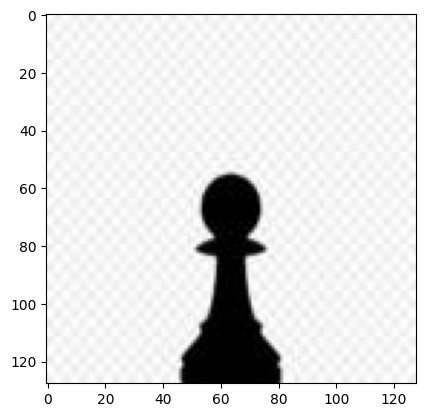

In [ ]:
# Display a random test image and its prediction
r = random.randint(0, len(test_loader.dataset)-1)
x_pred, y_pred = test_loader.dataset[r]

# Forward pass to get the prediction
x_pred = x_pred.unsqueeze(0).to(device)
actual_pred = model(x_pred)

# Show the prediction result
print("Label: ", y_pred)
pred = torch.argmax(actual_pred, 1).item()
if(pred==0):
  print("Prediction: Bishop")
elif(pred==1):
  print("Prediction: King")
elif(pred==2):
  print("Prediction: Knight")
elif(pred==3):
  print("Prediction: Pawn")
elif(pred==4):
  print("Prediction: Queen")
elif(pred==5):
  print("Prediction: Rook")


# Display the image
plt.imshow(x_pred.squeeze(0).cpu().numpy().transpose(1, 2, 0))
plt.show()